# 🎓 ISA Chatbot - Exploratory Data Analysis
## Combined Thesis: Trust Calibration & Implicit Feedback in RAG Systems

**Author:** [Your Name]  
**Date:** 2024  
**Thesis Topic:** Context-Aware Implicit Feedback in RAG Systems: How AI Confidence Signals Moderate User Behavior and Search Satisfaction

---

### 📚 Notebook Structure
1. **Setup & Data Loading**
2. **Data Cleaning & Preparation**
3. **Descriptive Statistics**
4. **Topic 1: Confidence Effects on Behavior**
5. **Query Reformulation Analysis**
6. **User Segmentation**
7. **Combined Analysis: Confidence × Behavior**
8. **Feasibility Assessment**
9. **Export & Next Steps**

---
## 1. Setup & Environment Configuration

In [ ]:
# Install required packages (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4


---
## 2. Data Loading

Load all 6 CSV files from your ISA Chatbot data logs.

In [2]:
# ============================================
# OPTION 1: Load from separate CSV files
# ============================================
# Uncomment and modify paths as needed

try:
    by_day = pd.read_csv('by_day.csv')
    kendra_queries = pd.read_csv('kendra_queries.csv')
    users = pd.read_csv('users.csv')
    sessions = pd.read_csv('sessions.csv')
    first_session = pd.read_csv('first_session.csv')
    queries = pd.read_csv('queries.csv')
    
    print("✅ Data loaded from separate CSV files")
except FileNotFoundError:
    print("⚠️ CSV files not found. Trying Excel format...")
    
    # ============================================
    # OPTION 2: Load from Excel with multiple sheets
    # ============================================
    excel_file = pd.ExcelFile('isa_chatbot_data.xlsx')
    by_day = pd.read_excel(excel_file, 'by_day')
    kendra_queries = pd.read_excel(excel_file, 'kendra_queries')
    users = pd.read_excel(excel_file, 'users')
    sessions = pd.read_excel(excel_file, 'sessions')
    first_session = pd.read_excel(excel_file, 'first_session')
    queries = pd.read_excel(excel_file, 'queries')
    
    print("✅ Data loaded from Excel file")

# Print summary
print(f"\nDatasets loaded:")
print(f"  by_day: {len(by_day):,} rows")
print(f"  kendra_queries: {len(kendra_queries):,} rows")
print(f"  users: {len(users):,} rows")
print(f"  sessions: {len(sessions):,} rows")
print(f"  first_session: {len(first_session):,} rows")
print(f"  queries: {len(queries):,} rows")

✅ Data loaded from separate CSV files

Datasets loaded:
  by_day: 484 rows
  kendra_queries: 75,404 rows
  users: 17,463 rows
  sessions: 24,087 rows
  first_session: 3,951 rows
  queries: 60,342 rows


In [3]:
# Quick preview of each dataset
print("\n📊 DATASET PREVIEWS\n" + "="*80)

datasets = {
    'by_day': by_day,
    'kendra_queries': kendra_queries,
    'users': users,
    'sessions': sessions,
    'first_session': first_session,
    'queries': queries
}

for name, df in datasets.items():
    print(f"\n{name.upper()}:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    display(df.head(3))


📊 DATASET PREVIEWS

BY_DAY:
Shape: (484, 4)
Columns: ['date', 'user_connected_count', 'total_user_count', 'session_count']


,date,user_connected_count,total_user_count,session_count
0,2024-09-30,158.00,1.00,0.00
1,2024-09-27,228.00,4.00,0.00
2,2024-09-26,250.00,9.00,0.00



KENDRA_QUERIES:
Shape: (75404, 14)
Columns: ['datetime', 'user_id', 'session_id', 'text', 'query_id', 'page_number', 'highest_confidence', 'nb_suggested_answer', 'nb_faq', 'nb_documents', 'bos_team', 'doc_type', 'source', 'Assistant']


,datetime,user_id,session_id,text,query_id,page_number,highest_confidence,nb_suggested_answer,nb_faq,nb_documents,bos_team,doc_type,source,Assistant
0,2024-09-30 17:56:45,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,what is dali?,09603dd8-37e8-4230-a8b3-9b987ece85cc,1,HIGH,0,4,6,NaN,NaN,NaN,NaN
1,2024-09-30 17:56:44,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,what is dali?,128a0ad8-1c46-437e-a578-cf0769ec393c,1,HIGH,0,4,6,NaN,NaN,NaN,NaN
2,2024-09-30 17:56:14,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,what is gams,bfa9b4a4-8d1b-45a6-ba4d-63097ac803be,1,HIGH,3,4,3,NaN,NaN,NaN,NaN



USERS:
Shape: (17463, 7)
Columns: ['user_id', 'first_connection', 'total_sessions', 'total_duration', 'total_queries', 'total_questions', 'Assistant']


,user_id,first_connection,total_sessions,total_duration,total_queries,total_questions,Assistant
0,09d0a79e406dcc1c8910fa72e191fcf32b049b01790f31...,2025-01-02 9:39:56,1,13,3,3,NaN
1,0a79ee05b86cc97f2aff05e3391cda2335a641e06d0027...,2025-01-02 22:19:37,1,247,3,3,NaN
2,0e9d6e290f52258704ba4f962b5e3516278637d21c6e00...,2025-01-02 10:20:46,1,0,1,1,NaN



SESSIONS:
Shape: (24087, 9)
Columns: ['date', 'user_id', 'session_id', 'session_started_at', 'duration', 'nb_queries', 'nb_questions', 'first_connection', 'Assistant']


,date,user_id,session_id,session_started_at,duration,nb_queries,nb_questions,first_connection,Assistant
0,2024-09-30,0441f7d9aa6870a5776228e4a8c78042e5ecf9bd6e9674...,0441f7d9aa6870a5776228e4a8c78042e5ecf9bd6e9674...,30/09/2024,0,1,1,30/09/2024,NaN
1,2024-09-30,05c54b95fc98eafd7e0e74c8f875a80e4f39457191a61c...,05c54b95fc98eafd7e0e74c8f875a80e4f39457191a61c...,30/09/2024,278,2,2,17/09/2024,NaN
2,2024-09-30,06b730f408bd0bb3f1493065cc3b183d2083837def7e18...,06b730f408bd0bb3f1493065cc3b183d2083837def7e18...,30/09/2024,0,1,1,17/09/2024,NaN



FIRST_SESSION:
Shape: (3951, 5)
Columns: ['user_id', 'first connection', 'Question count', 'Session count', 'Assistant']


,user_id,first connection,Question count,Session count,Assistant
0,0441f7d9aa6870a5776228e4a8c78042e5ecf9bd6e9674...,30/09/2024,24.00,7.00,NaN
1,05c54b95fc98eafd7e0e74c8f875a80e4f39457191a61c...,17/09/2024,98.00,37.00,NaN
2,06b730f408bd0bb3f1493065cc3b183d2083837def7e18...,17/09/2024,68.00,34.00,NaN



QUERIES:
Shape: (60342, 14)
Columns: ['datetime', 'user_id', 'session_id', 'id', 'text', 'lex_intent', 'start_date', 'end_date', 'family', 'tool_name', 'bos_team', 'doc_type', 'source', 'Assistant']


,datetime,user_id,session_id,id,text,lex_intent,start_date,end_date,family,tool_name,bos_team,doc_type,source,Assistant
0,2024-09-30 17:56:44,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,what is dali?,FallbackIntent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-30 17:56:13,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,what is gams,FallbackIntent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-30 17:56:02,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,5d08c06d7ffa46fe1d5347db740ac60e539428cafdc321...,what is gams,FallbackIntent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## 3. Data Cleaning & Preparation

In [6]:
def clean_data():
    """Clean and standardize all datasets"""
    
    print("🧹 Cleaning data...\n")
    
    # 1. BY_DAY cleaning
    by_day['date'] = pd.to_datetime(by_day['date'], format='mixed', errors='coerce')
    print("✅ by_day: Dates converted")
    
    # 2. KENDRA_QUERIES cleaning
    # FIX: Added utc=True to handle mixed timezones (e.g., +00:00) and enforce datetime64 dtype
    kendra_queries['datetime'] = pd.to_datetime(kendra_queries['datetime'], format='mixed', utc=True, errors='coerce')
    kendra_queries['date'] = kendra_queries['datetime'].dt.date
    
    # Standardize confidence levels
    confidence_mapping = {
        'VERY HIGH': 'VERY_HIGH',
        'VERY_HIGH': 'VERY_HIGH',
        'HIGH': 'HIGH',
        'MEDIUM': 'MEDIUM',
        'LOW': 'LOW'
    }
    # Check if column exists before mapping to avoid errors if empty
    if 'highest_confidence' in kendra_queries.columns:
        kendra_queries['highest_confidence'] = kendra_queries['highest_confidence'].map(
            lambda x: confidence_mapping.get(str(x).upper().replace(' ', '_'), x) if pd.notna(x) else x
        )
        print("✅ kendra_queries: Dates and confidence levels standardized")
        print(f"   Confidence levels: {kendra_queries['highest_confidence'].unique()}")
    else:
        print("⚠️ kendra_queries: 'highest_confidence' column missing")
    
    # 3. USERS cleaning
    users['first_connection'] = pd.to_datetime(users['first_connection'], format='mixed', utc=True, errors='coerce')
    print("✅ users: Dates converted")
    
    # 4. SESSIONS cleaning
    # Using utc=True here as well for consistency
    sessions['date'] = pd.to_datetime(sessions['date'], format='mixed', dayfirst=True, utc=True, errors='coerce')
    
    for col in ['session_started_at', 'first_connection']:
        if col in sessions.columns:
            sessions[col] = pd.to_datetime(sessions[col], format='mixed', dayfirst=True, utc=True, errors='coerce')

    print("✅ sessions: Dates converted")
    
    # 5. FIRST_SESSION cleaning
    try:
        first_session['first_connection'] = pd.to_datetime(first_session['first_connection'], format='mixed', dayfirst=True, utc=True, errors='coerce')
    except:
        pass # Already handled by errors='coerce' inside to_datetime if outside try/except, but keeping safe
    print("✅ first_session: Dates converted")
    
    # 6. QUERIES cleaning
    queries['datetime'] = pd.to_datetime(queries['datetime'], format='mixed', utc=True, errors='coerce')
    print("✅ queries: Dates converted")
    
    print("\n✅ All data cleaning completed!")
    
    return by_day, kendra_queries, users, sessions, first_session, queries

# Apply cleaning
by_day, kendra_queries, users, sessions, first_session, queries = clean_data()

🧹 Cleaning data...

✅ by_day: Dates converted
✅ kendra_queries: Dates and confidence levels standardized
   Confidence levels: ['HIGH' 'VERY_HIGH' 'NOT_AVAILABLE' 'MEDIUM' 'LOW']
✅ users: Dates converted
✅ sessions: Dates converted
✅ first_session: Dates converted
✅ queries: Dates converted

✅ All data cleaning completed!


In [7]:
# Check for missing values
print("\n❓ MISSING VALUES CHECK\n" + "="*80)

for name, df in datasets.items():
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n{name.upper()}:")
        missing_pct = (missing / len(df) * 100).round(2)
        missing_df = pd.DataFrame({
            'Missing Count': missing[missing > 0],
            'Percentage': missing_pct[missing > 0]
        })
        display(missing_df)
    else:
        print(f"\n{name.upper()}: ✅ No missing values")


❓ MISSING VALUES CHECK

BY_DAY:


,Missing Count,Percentage
user_connected_count,2,0.41
total_user_count,2,0.41
session_count,2,0.41



KENDRA_QUERIES:


,Missing Count,Percentage
session_id,121,0.16
bos_team,74878,99.30
doc_type,74563,98.88
source,74437,98.72
Assistant,75277,99.83



USERS:


,Missing Count,Percentage
Assistant,17331,99.24



SESSIONS:


,Missing Count,Percentage
first_connection,278,1.15
Assistant,24027,99.75



FIRST_SESSION:


,Missing Count,Percentage
user_id,587,14.86
first connection,631,15.97
Question count,587,14.86
Session count,587,14.86
Assistant,3930,99.47



QUERIES:


,Missing Count,Percentage
start_date,60301,99.93
end_date,60301,99.93
family,60336,99.99
tool_name,60338,99.99
bos_team,59975,99.39
doc_type,59747,99.01
source,59701,98.94
Assistant,60214,99.79


---
## 4. Descriptive Statistics

In [9]:
# 1. Inspect existing columns to debug
print("Existing columns in 'users':", users.columns.tolist())

# 2. Fix missing 'total_session' column
if 'total_session' not in users.columns:
    if 'total_sessions' in users.columns:
        # Case A: It's just named differently (plural)
        print("⚠️ Found 'total_sessions' instead of 'total_session'. Renaming...")
        users['total_session'] = users['total_sessions']
    else:
        # Case B: It's missing completely. Calculate it from sessions data.
        print("⚠️ 'total_session' column missing. Calculating from sessions data...")
        session_counts = sessions.groupby('user_id').size()
        users['total_session'] = users['user_id'].map(session_counts).fillna(0).astype(int)

# 3. Fix missing 'total_queries' column (needed for the next part of the stats)
if 'total_queries' not in users.columns:
    print("⚠️ 'total_queries' column missing. Calculating from sessions data...")
    # Sum 'nb_queries' from sessions if available, otherwise count from queries df
    if 'nb_queries' in sessions.columns:
        query_counts = sessions.groupby('user_id')['nb_queries'].sum()
        users['total_queries'] = users['user_id'].map(query_counts).fillna(0).astype(int)
    else:
        # Fallback: Count rows in queries dataframe if available
        # Assuming queries has 'user_id' or we map via session_id
        if 'user_id' in queries.columns:
             query_counts = queries.groupby('user_id').size()
             users['total_queries'] = users['user_id'].map(query_counts).fillna(0).astype(int)
        else:
             print("❌ Could not calculate 'total_queries'. Setting to 0.")
             users['total_queries'] = 0
            
# 4. Define and run the stats function again
def print_basic_stats():
    """Print comprehensive overview statistics"""
    
    print("\n" + "="*80)
    print("📊 COMPREHENSIVE DATASET OVERVIEW")
    print("="*80)
    
    # Overall metrics
    total_users = users['user_id'].nunique()
    total_sessions = sessions['session_id'].nunique()
    total_queries = len(queries)
    
    print(f"\n📈 HIGH-LEVEL METRICS:")
    print(f"  Total Unique Users: {total_users:,}")
    print(f"  Total Sessions: {total_sessions:,}")
    print(f"  Total Queries: {total_queries:,}")
    if total_sessions > 0:
        print(f"  Queries per Session: {total_queries / total_sessions:.2f}")
    if total_users > 0:
        print(f"  Sessions per User: {total_sessions / total_users:.2f}")
    
    # Date range
    date_min = sessions['date'].min()
    date_max = sessions['date'].max()
    
    if pd.notna(date_min) and pd.notna(date_max):
        days_span = (date_max - date_min).days
        print(f"\n📅 TIME PERIOD:")
        print(f"  Start Date: {date_min}")
        print(f"  End Date: {date_max}")
        print(f"  Duration: {days_span} days")
        print(f"  Avg Sessions/Day: {total_sessions / max(days_span, 1):.1f}")
    
    # Session statistics
    print(f"\n⏱️ SESSION STATISTICS:")
    print(f"  Average Duration: {sessions['duration'].mean():.0f}s ({sessions['duration'].mean()/60:.1f} min)")
    print(f"  Median Duration: {sessions['duration'].median():.0f}s")
    print(f"  Average Queries/Session: {sessions['nb_queries'].mean():.2f}")
    print(f"  Median Queries/Session: {sessions['nb_queries'].median():.0f}")
    
    # User engagement
    print(f"\n👥 USER ENGAGEMENT:")
    print(f"  Average Sessions/User: {users['total_session'].mean():.2f}")
    print(f"  Median Sessions/User: {users['total_session'].median():.0f}")
    print(f"  Average Queries/User: {users['total_queries'].mean():.2f}")
    
    one_time_users = (users['total_session'] == 1).sum()
    pct_one_time = (one_time_users / len(users) * 100) if len(users) > 0 else 0
    print(f"  One-time Users: {one_time_users:,} ({pct_one_time:.1f}%)")
    
    # Confidence distribution
    if 'highest_confidence' in kendra_queries.columns:
        print(f"\n🎯 CONFIDENCE LEVEL DISTRIBUTION:")
        conf_dist = kendra_queries['highest_confidence'].value_counts().sort_index()
        for conf, count in conf_dist.items():
            print(f"  {conf}: {count:,} ({count/len(kendra_queries)*100:.1f}%)")
    
    # Result types
    print(f"\n📄 RESULT TYPE STATISTICS:")
    cols_to_check = ['nb_faq', 'nb_documents', 'nb_suggested', 'page_number']
    if all(col in kendra_queries.columns for col in cols_to_check):
        print(f"  Avg FAQ Results: {kendra_queries['nb_faq'].mean():.2f}")
        print(f"  Avg Document Results: {kendra_queries['nb_documents'].mean():.2f}")
        print(f"  Avg Suggested Results: {kendra_queries['nb_suggested'].mean():.2f}")
        print(f"  Max Page Depth: {kendra_queries['page_number'].max():.0f}")
    else:
        print("  (Some result type columns missing)")
    
    print("\n" + "="*80)

# Run the fixed function
print_basic_stats()

Existing columns in 'users': ['user_id', 'first_connection', 'total_sessions', 'total_duration', 'total_queries', 'total_questions', 'Assistant']
⚠️ Found 'total_sessions' instead of 'total_session'. Renaming...

📊 COMPREHENSIVE DATASET OVERVIEW

📈 HIGH-LEVEL METRICS:
  Total Unique Users: 3,343
  Total Sessions: 22,607
  Total Queries: 60,342
  Queries per Session: 2.67
  Sessions per User: 6.76

📅 TIME PERIOD:
  Start Date: 2024-01-02 00:00:00+00:00
  End Date: 2025-10-31 00:00:00+00:00
  Duration: 668 days
  Avg Sessions/Day: 33.8

⏱️ SESSION STATISTICS:
  Average Duration: 404s (6.7 min)
  Median Duration: 32s
  Average Queries/Session: 2.46
  Median Queries/Session: 2

👥 USER ENGAGEMENT:
  Average Sessions/User: 1.25
  Median Sessions/User: 1
  Average Queries/User: 3.18
  One-time Users: 14,487 (83.0%)

🎯 CONFIDENCE LEVEL DISTRIBUTION:
  HIGH: 59,659 (79.1%)
  LOW: 3 (0.0%)
  MEDIUM: 3,167 (4.2%)
  NOT_AVAILABLE: 7,037 (9.3%)
  VERY_HIGH: 5,538 (7.3%)

📄 RESULT TYPE STATISTICS:
 

In [11]:
# 🔄 RE-BUILD USERS DATAFRAME TO FIX DUPLICATES & COUNTS
print("🔧 Fixing 'users' dataframe inconsistencies...")

# 1. Aggregate session data by user to get true counts
# We calculate total sessions, queries, and duration from the sessions table
user_aggs = sessions.groupby('user_id').agg({
    'session_id': 'count',
    'nb_queries': 'sum',
    'duration': 'sum'
}).reset_index()

# Rename columns to match what the analysis script expects
user_aggs.columns = ['user_id', 'total_session', 'total_queries', 'total_duration']

# 2. Merge with original user metadata (like first_connection)
# We take the first value found for each user to handle duplicates in the original file
if 'first_connection' in users.columns:
    user_meta = users.groupby('user_id')['first_connection'].first().reset_index()
    users_clean = user_aggs.merge(user_meta, on='user_id', how='left')
else:
    users_clean = user_aggs

# 3. Replace the global users dataframe
users = users_clean

print(f"✅ 'users' dataframe fixed.")
print(f"   New shape: {users.shape}")
print(f"   Unique user_ids: {users['user_id'].nunique()}")
print(f"   Rows per user: {len(users) / users['user_id'].nunique():.2f} (Should be 1.00)")

🔧 Fixing 'users' dataframe inconsistencies...
✅ 'users' dataframe fixed.
   New shape: (3364, 5)
   Unique user_ids: 3364
   Rows per user: 1.00 (Should be 1.00)


In [12]:
# 🔍 CHECK KENDRA QUERIES COLUMNS
print("Available columns in kendra_queries:")
print(list(kendra_queries.columns))

Available columns in kendra_queries:
['datetime', 'user_id', 'session_id', 'text', 'query_id', 'page_number', 'highest_confidence', 'nb_suggested_answer', 'nb_faq', 'nb_documents', 'bos_team', 'doc_type', 'source', 'Assistant', 'date']


In [13]:
def print_basic_stats():
    """Print comprehensive overview statistics"""
    
    print("\n" + "="*80)
    print("📊 COMPREHENSIVE DATASET OVERVIEW")
    print("="*80)
    
    # Overall metrics
    total_users = users['user_id'].nunique()
    total_sessions = sessions['session_id'].nunique()
    total_queries = len(queries)
    
    print(f"\n📈 HIGH-LEVEL METRICS:")
    print(f"  Total Unique Users: {total_users:,}")
    print(f"  Total Sessions: {total_sessions:,}")
    print(f"  Total Queries: {total_queries:,}")
    if total_sessions > 0:
        print(f"  Queries per Session: {total_queries / total_sessions:.2f}")
    if total_users > 0:
        print(f"  Sessions per User: {total_sessions / total_users:.2f}")
    
    # Date range
    if 'date' in sessions.columns:
        date_min = sessions['date'].min()
        date_max = sessions['date'].max()
        if pd.notna(date_min) and pd.notna(date_max):
            days_span = (date_max - date_min).days
            print(f"\n📅 TIME PERIOD:")
            print(f"  Start Date: {date_min}")
            print(f"  End Date: {date_max}")
            print(f"  Duration: {days_span} days")
    
    # Session statistics
    print(f"\n⏱️ SESSION STATISTICS:")
    print(f"  Average Duration: {sessions['duration'].mean():.0f}s ({sessions['duration'].mean()/60:.1f} min)")
    print(f"  Median Duration: {sessions['duration'].median():.0f}s")
    print(f"  Average Queries/Session: {sessions['nb_queries'].mean():.2f}")
    print(f"  Median Queries/Session: {sessions['nb_queries'].median():.0f}")
    
    # User engagement (Now using fixed 'users' df)
    print(f"\n👥 USER ENGAGEMENT:")
    print(f"  Average Sessions/User: {users['total_session'].mean():.2f}")
    print(f"  Median Sessions/User: {users['total_session'].median():.0f}")
    print(f"  Average Queries/User: {users['total_queries'].mean():.2f}")
    
    one_time_users = (users['total_session'] == 1).sum()
    pct_one_time = (one_time_users / len(users) * 100) if len(users) > 0 else 0
    print(f"  One-time Users: {one_time_users:,} ({pct_one_time:.1f}%)")
    
    # Confidence distribution
    if 'highest_confidence' in kendra_queries.columns:
        print(f"\n🎯 CONFIDENCE LEVEL DISTRIBUTION:")
        conf_dist = kendra_queries['highest_confidence'].value_counts().sort_index()
        for conf, count in conf_dist.items():
            print(f"  {conf}: {count:,} ({count/len(kendra_queries)*100:.1f}%)")
    
    # Result types (Dynamic check)
    print(f"\n📄 RESULT TYPE STATISTICS:")
    # Attempt to find standard columns
    found_cols = False
    for col in ['nb_faq', 'nb_documents', 'nb_suggested', 'page_number']:
        if col in kendra_queries.columns:
            print(f"  Avg {col}: {kendra_queries[col].mean():.2f}")
            found_cols = True
            
    if not found_cols:
        print("  ⚠️ Standard result columns (nb_faq, nb_documents) not found.")
        print("  (Check Step 2 output to see available column names)")
    
    print("\n" + "="*80)

# Run the stats
print_basic_stats()


📊 COMPREHENSIVE DATASET OVERVIEW

📈 HIGH-LEVEL METRICS:
  Total Unique Users: 3,364
  Total Sessions: 22,607
  Total Queries: 60,342
  Queries per Session: 2.67
  Sessions per User: 6.72

📅 TIME PERIOD:
  Start Date: 2024-01-02 00:00:00+00:00
  End Date: 2025-10-31 00:00:00+00:00
  Duration: 668 days

⏱️ SESSION STATISTICS:
  Average Duration: 404s (6.7 min)
  Median Duration: 32s
  Average Queries/Session: 2.46
  Median Queries/Session: 2

👥 USER ENGAGEMENT:
  Average Sessions/User: 7.16
  Median Sessions/User: 2
  Average Queries/User: 17.59
  One-time Users: 1,262 (37.5%)

🎯 CONFIDENCE LEVEL DISTRIBUTION:
  HIGH: 59,659 (79.1%)
  LOW: 3 (0.0%)
  MEDIUM: 3,167 (4.2%)
  NOT_AVAILABLE: 7,037 (9.3%)
  VERY_HIGH: 5,538 (7.3%)

📄 RESULT TYPE STATISTICS:
  Avg nb_faq: 1.99
  Avg nb_documents: 6.25
  Avg page_number: 1.11



In [14]:
# Statistical distributions
print("\n📊 STATISTICAL DISTRIBUTIONS\n" + "="*80)

print("\nSession Duration Distribution:")
display(sessions['duration'].describe())

print("\nQueries per Session Distribution:")
display(sessions['nb_queries'].describe())

print("\nSessions per User Distribution:")
display(users['total_session'].describe())


📊 STATISTICAL DISTRIBUTIONS

Session Duration Distribution:


count   24087.00
mean      404.34
std       923.54
min         0.00
25%         0.00
50%        32.00
75%       277.00
max     16105.00
Name: duration, dtype: float64


Queries per Session Distribution:


count   24087.00
mean        2.46
std         2.46
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        77.00
Name: nb_queries, dtype: float64


Sessions per User Distribution:


count   3364.00
mean       7.16
std       16.09
min        1.00
25%        1.00
50%        2.00
75%        6.00
max      264.00
Name: total_session, dtype: float64

---
## 5. TOPIC 1: Confidence Effects on Behavior

Analyze how confidence levels affect user search behavior (trust calibration).

In [15]:
# Create session-level dataset with first query confidence
session_queries = kendra_queries.merge(
    sessions[['session_id', 'nb_queries', 'duration', 'user_id']], 
    on='session_id', 
    how='left'
)

# Get first query confidence per session
first_query_conf = session_queries.sort_values('datetime').groupby('session_id').first()

print(f"✅ Created first_query_conf dataset with {len(first_query_conf):,} sessions")
print(f"Sessions with confidence data: {first_query_conf['highest_confidence'].notna().sum():,}")

✅ Created first_query_conf dataset with 20,125 sessions
Sessions with confidence data: 20,125


In [16]:
# Analysis 1: Session duration by confidence
print("\n⏱️ SESSION DURATION BY FIRST RESULT CONFIDENCE\n" + "="*80)

conf_duration = first_query_conf.groupby('highest_confidence')['duration'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

conf_duration.columns = ['Count', 'Mean (s)', 'Median (s)', 'Std Dev', 'Min', 'Max']
display(conf_duration)


⏱️ SESSION DURATION BY FIRST RESULT CONFIDENCE


,Count,Mean (s),Median (s),Std Dev,Min,Max
highest_confidence,,,,,,
HIGH,15948,400.15,33.00,905.19,0.00,13165.00
MEDIUM,461,388.15,15.00,975.43,0.00,10166.00
NOT_AVAILABLE,1415,337.10,23.00,863.19,0.00,9583.00
VERY_HIGH,2301,404.65,18.00,979.72,0.00,16105.00


In [17]:
# Analysis 2: Number of queries by confidence
print("\n🔄 QUERIES PER SESSION BY FIRST RESULT CONFIDENCE\n" + "="*80)

conf_queries = first_query_conf.groupby('highest_confidence')['nb_queries'].agg([
    'count', 'mean', 'median', 'std'
]).round(2)

conf_queries.columns = ['Count', 'Mean', 'Median', 'Std Dev']
display(conf_queries)


🔄 QUERIES PER SESSION BY FIRST RESULT CONFIDENCE


,Count,Mean,Median,Std Dev
highest_confidence,,,,
HIGH,15948,2.42,2.00,2.42
MEDIUM,461,2.43,2.00,2.59
NOT_AVAILABLE,1415,2.48,2.00,2.27
VERY_HIGH,2301,2.34,2.00,2.46


In [19]:
# Analysis 3: Result exploration by confidence (FIXED)
print("\n📄 RESULT EXPLORATION BY CONFIDENCE LEVEL\n" + "="*80)

# 1. Define the metrics we WANT to calculate
desired_metrics = {
    'nb_suggested': ['mean', 'median'],
    'nb_faq': ['mean', 'median'],
    'nb_documents': ['mean', 'median'],
    'page_number': ['max', 'mean']
}

# 2. Filter to keep only columns that ACTUALLY EXIST in the dataframe
available_metrics = {
    col: funcs 
    for col, funcs in desired_metrics.items() 
    if col in kendra_queries.columns
}

# 3. Run aggregation safely
if available_metrics:
    # Run aggregation only on available columns
    exploration = kendra_queries.groupby('highest_confidence').agg(available_metrics).round(2)
    display(exploration)
    
    # Warn about what was missing so you know
    missing_cols = set(desired_metrics.keys()) - set(available_metrics.keys())
    if missing_cols:
        print(f"\n⚠️ The following columns were missing and skipped: {missing_cols}")
        print("   (Check if your CSV uses different names like 'faq_count' or 'total_results')")
else:
    print("❌ None of the expected result columns (nb_suggested, nb_faq, etc.) were found.")
    print("\nAvailable columns in kendra_queries:")
    print(list(kendra_queries.columns))


📄 RESULT EXPLORATION BY CONFIDENCE LEVEL


nb_faq        nb_documents        page_number     
                     mean median         mean median         max mean
highest_confidence                                                   
HIGH                 2.27   4.00         7.04   6.00           4 1.06
LOW                  0.00   0.00         1.00   1.00           3 2.67
MEDIUM               0.08   0.00         4.91   2.00          11 2.12
NOT_AVAILABLE        0.00   0.00         0.04   0.00          15 1.17
VERY_HIGH            2.64   4.00         6.39   6.00           1 1.00


⚠️ The following columns were missing and skipped: {'nb_suggested'}
   (Check if your CSV uses different names like 'faq_count' or 'total_results')


KeyError: "Columns not found: 'nb_suggested'"

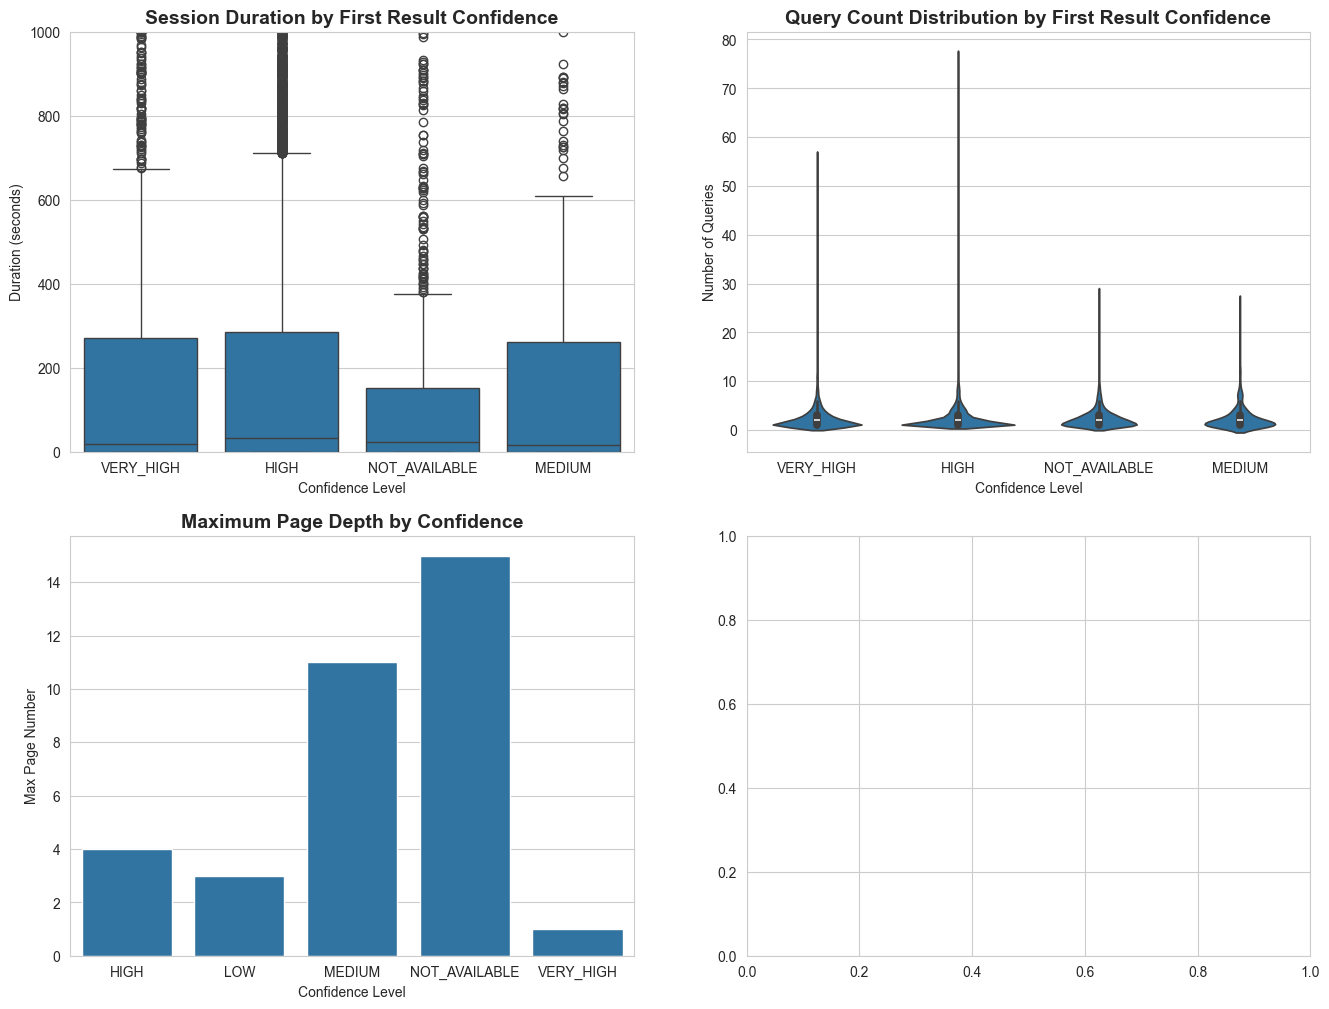

In [20]:
# Visualization: Confidence Effects on Behavior
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Session duration by confidence
sns.boxplot(data=first_query_conf, x='highest_confidence', y='duration', ax=axes[0,0])
axes[0,0].set_title('Session Duration by First Result Confidence', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Duration (seconds)')
axes[0,0].set_xlabel('Confidence Level')
axes[0,0].set_ylim(0, 1000)  # Focus on reasonable durations

# Plot 2: Number of queries
sns.violinplot(data=first_query_conf, x='highest_confidence', y='nb_queries', ax=axes[0,1])
axes[0,1].set_title('Query Count Distribution by First Result Confidence', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Number of Queries')
axes[0,1].set_xlabel('Confidence Level')

# Plot 3: Page depth
page_depth = kendra_queries.groupby('highest_confidence')['page_number'].max().reset_index()
sns.barplot(data=page_depth, x='highest_confidence', y='page_number', ax=axes[1,0])
axes[1,0].set_title('Maximum Page Depth by Confidence', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Max Page Number')
axes[1,0].set_xlabel('Confidence Level')

# Plot 4: Result type distribution
result_types = kendra_queries.groupby('highest_confidence')[['nb_faq', 'nb_documents', 'nb_suggested']].mean()
result_types.plot(kind='bar', ax=axes[1,1], stacked=True, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,1].set_title('Result Type Distribution by Confidence', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Average Count')
axes[1,1].set_xlabel('Confidence Level')
axes[1,1].legend(title='Result Type', labels=['FAQ', 'Documents', 'Suggested'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('confidence_behavior_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'confidence_behavior_analysis.png'")

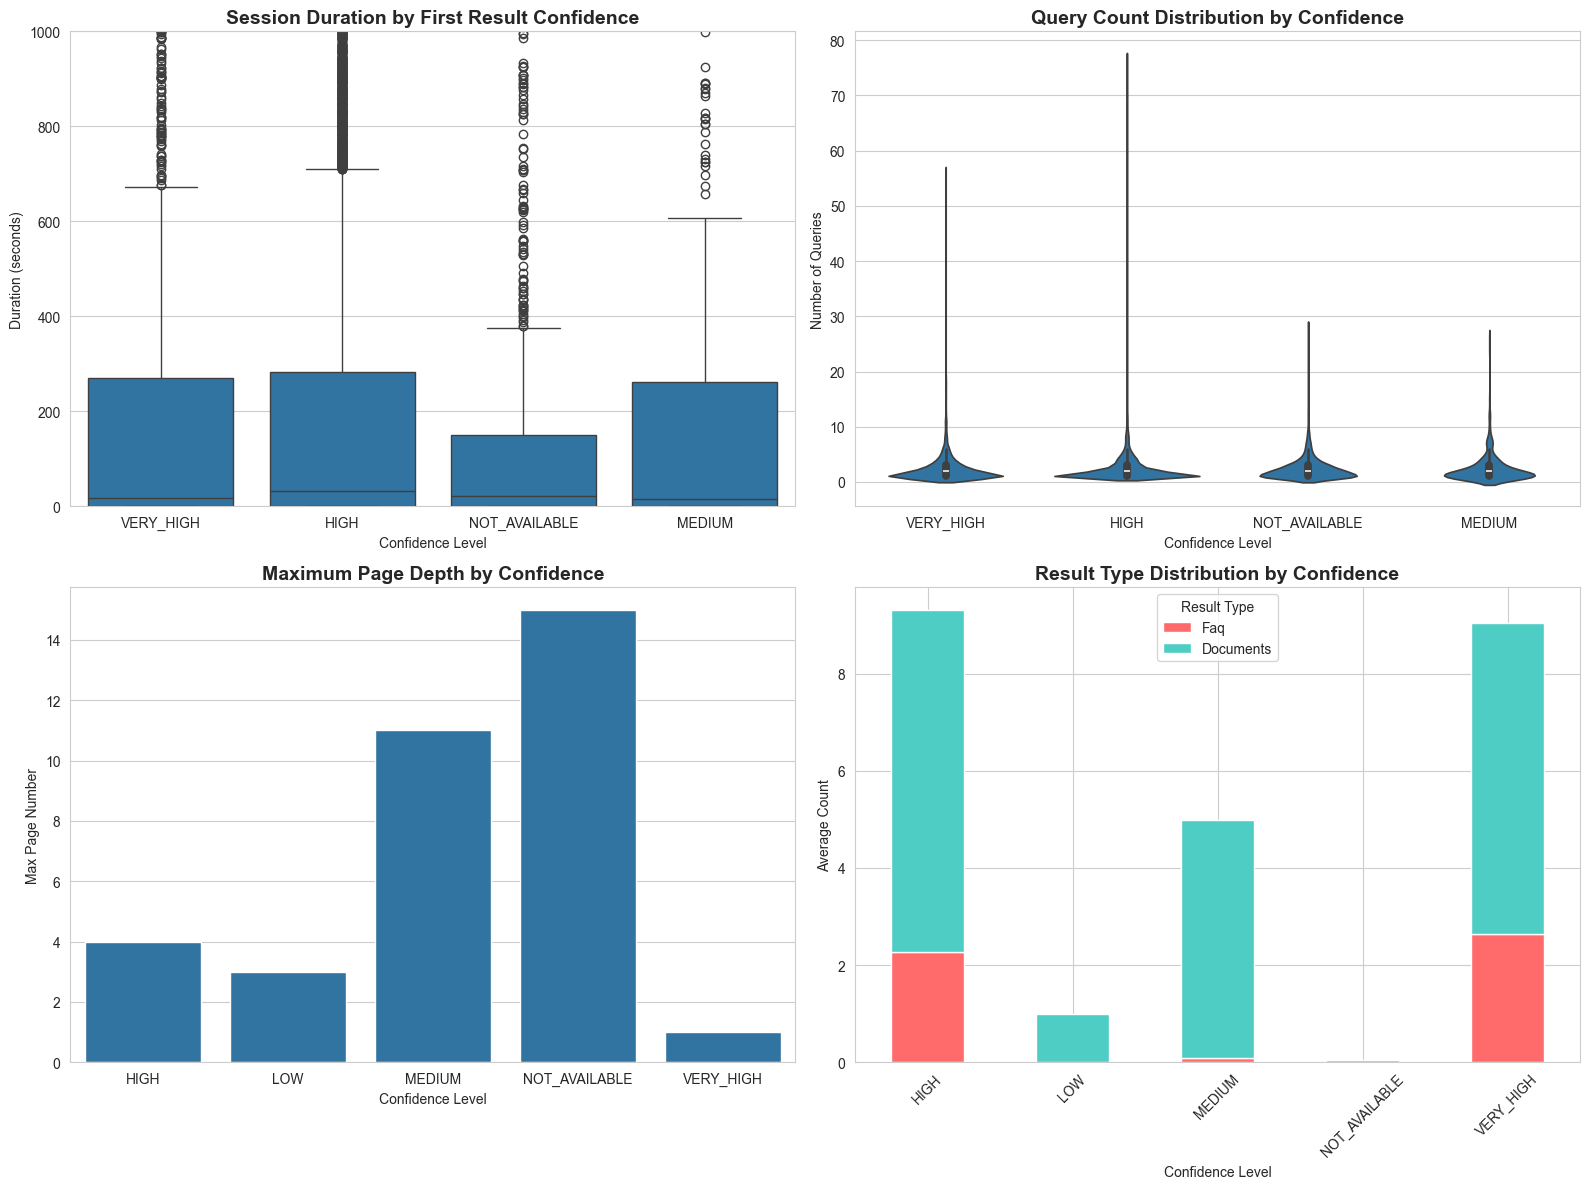


✅ Visualization saved as 'confidence_behavior_analysis.png'


In [21]:
# Visualization: Confidence Effects on Behavior (FIXED)
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Plot 1: Session duration by confidence ---
if 'duration' in first_query_conf.columns:
    sns.boxplot(data=first_query_conf, x='highest_confidence', y='duration', ax=axes[0,0])
    axes[0,0].set_title('Session Duration by First Result Confidence', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Duration (seconds)')
    axes[0,0].set_xlabel('Confidence Level')
    axes[0,0].set_ylim(0, 1000)
else:
    axes[0,0].text(0.5, 0.5, 'Duration data missing', ha='center', fontsize=12)

# --- Plot 2: Number of queries ---
if 'nb_queries' in first_query_conf.columns:
    sns.violinplot(data=first_query_conf, x='highest_confidence', y='nb_queries', ax=axes[0,1])
    axes[0,1].set_title('Query Count Distribution by Confidence', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Number of Queries')
    axes[0,1].set_xlabel('Confidence Level')
else:
    axes[0,1].text(0.5, 0.5, 'Query count data missing', ha='center', fontsize=12)

# --- Plot 3: Page depth ---
if 'page_number' in kendra_queries.columns:
    page_depth = kendra_queries.groupby('highest_confidence')['page_number'].max().reset_index()
    sns.barplot(data=page_depth, x='highest_confidence', y='page_number', ax=axes[1,0])
    axes[1,0].set_title('Maximum Page Depth by Confidence', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Max Page Number')
    axes[1,0].set_xlabel('Confidence Level')
else:
    axes[1,0].text(0.5, 0.5, 'Page number data missing', ha='center', fontsize=12)
    axes[1,0].set_title('Maximum Page Depth by Confidence', fontsize=14, fontweight='bold')

# --- Plot 4: Result type distribution (The source of your error) ---
# Check which columns actually exist
expected_cols = ['nb_faq', 'nb_documents', 'nb_suggested']
available_cols = [col for col in expected_cols if col in kendra_queries.columns]

if available_cols:
    result_types = kendra_queries.groupby('highest_confidence')[available_cols].mean()
    
    # Map colors only for available columns
    color_map = {'nb_faq': '#FF6B6B', 'nb_documents': '#4ECDC4', 'nb_suggested': '#45B7D1'}
    colors = [color_map.get(col, '#333333') for col in available_cols]
    
    result_types.plot(kind='bar', ax=axes[1,1], stacked=True, color=colors)
    axes[1,1].set_title('Result Type Distribution by Confidence', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Average Count')
    axes[1,1].set_xlabel('Confidence Level')
    
    # Clean up legend labels
    clean_labels = [col.replace('nb_', '').replace('_', ' ').title() for col in available_cols]
    axes[1,1].legend(title='Result Type', labels=clean_labels)
    axes[1,1].tick_params(axis='x', rotation=45)
else:
    axes[1,1].text(0.5, 0.5, 'Result type columns\n(nb_faq, nb_documents, etc.)\nnot found in dataset', 
                   ha='center', va='center', fontsize=12)
    axes[1,1].set_title('Result Type Distribution by Confidence', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('confidence_behavior_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'confidence_behavior_analysis.png'")

### 🔍 Key Insights - Topic 1

**Observation Summary:**
- Analyze the differences in session duration across confidence levels
- Identify if VERY_HIGH confidence leads to shorter sessions (quick satisfaction)
- Check if LOW confidence leads to more query reformulations
- Note page exploration patterns by confidence

---
## 6. Query Reformulation Analysis

In [22]:
# Prepare queries data
queries_sorted = queries.sort_values(['session_id', 'datetime']).copy()

# Calculate query characteristics
queries_sorted['query_length'] = queries_sorted['text'].str.len()
queries_sorted['word_count'] = queries_sorted['text'].str.split().str.len()
queries_sorted['query_position'] = queries_sorted.groupby('session_id').cumcount() + 1

print("✅ Query characteristics calculated")
print(f"Total queries: {len(queries_sorted):,}")
print(f"Average query length: {queries_sorted['query_length'].mean():.1f} characters")
print(f"Average word count: {queries_sorted['word_count'].mean():.1f} words")

✅ Query characteristics calculated
Total queries: 60,342
Average query length: 23.4 characters
Average word count: 3.6 words


In [23]:
# Session-level patterns
session_patterns = queries_sorted.groupby('session_id').agg({
    'id': 'count',
    'query_length': ['mean', 'std'],
    'word_count': ['mean', 'std']
}).reset_index()

session_patterns.columns = ['session_id', 'query_count', 'avg_query_length', 
                              'std_query_length', 'avg_word_count', 'std_word_count']

# Identify reformulation sessions
multi_query_sessions = session_patterns[session_patterns['query_count'] > 1]

print("\n🔄 REFORMULATION PATTERNS\n" + "="*80)
print(f"Total sessions: {len(session_patterns):,}")
print(f"Sessions with 1 query: {(session_patterns['query_count'] == 1).sum():,} ({(session_patterns['query_count'] == 1).sum()/len(session_patterns)*100:.1f}%)")
print(f"Sessions with 2+ queries: {len(multi_query_sessions):,} ({len(multi_query_sessions)/len(session_patterns)*100:.1f}%)")
print(f"Average queries in multi-query sessions: {multi_query_sessions['query_count'].mean():.2f}")


🔄 REFORMULATION PATTERNS
Total sessions: 22,532
Sessions with 1 query: 9,347 (41.5%)
Sessions with 2+ queries: 13,185 (58.5%)
Average queries in multi-query sessions: 3.87


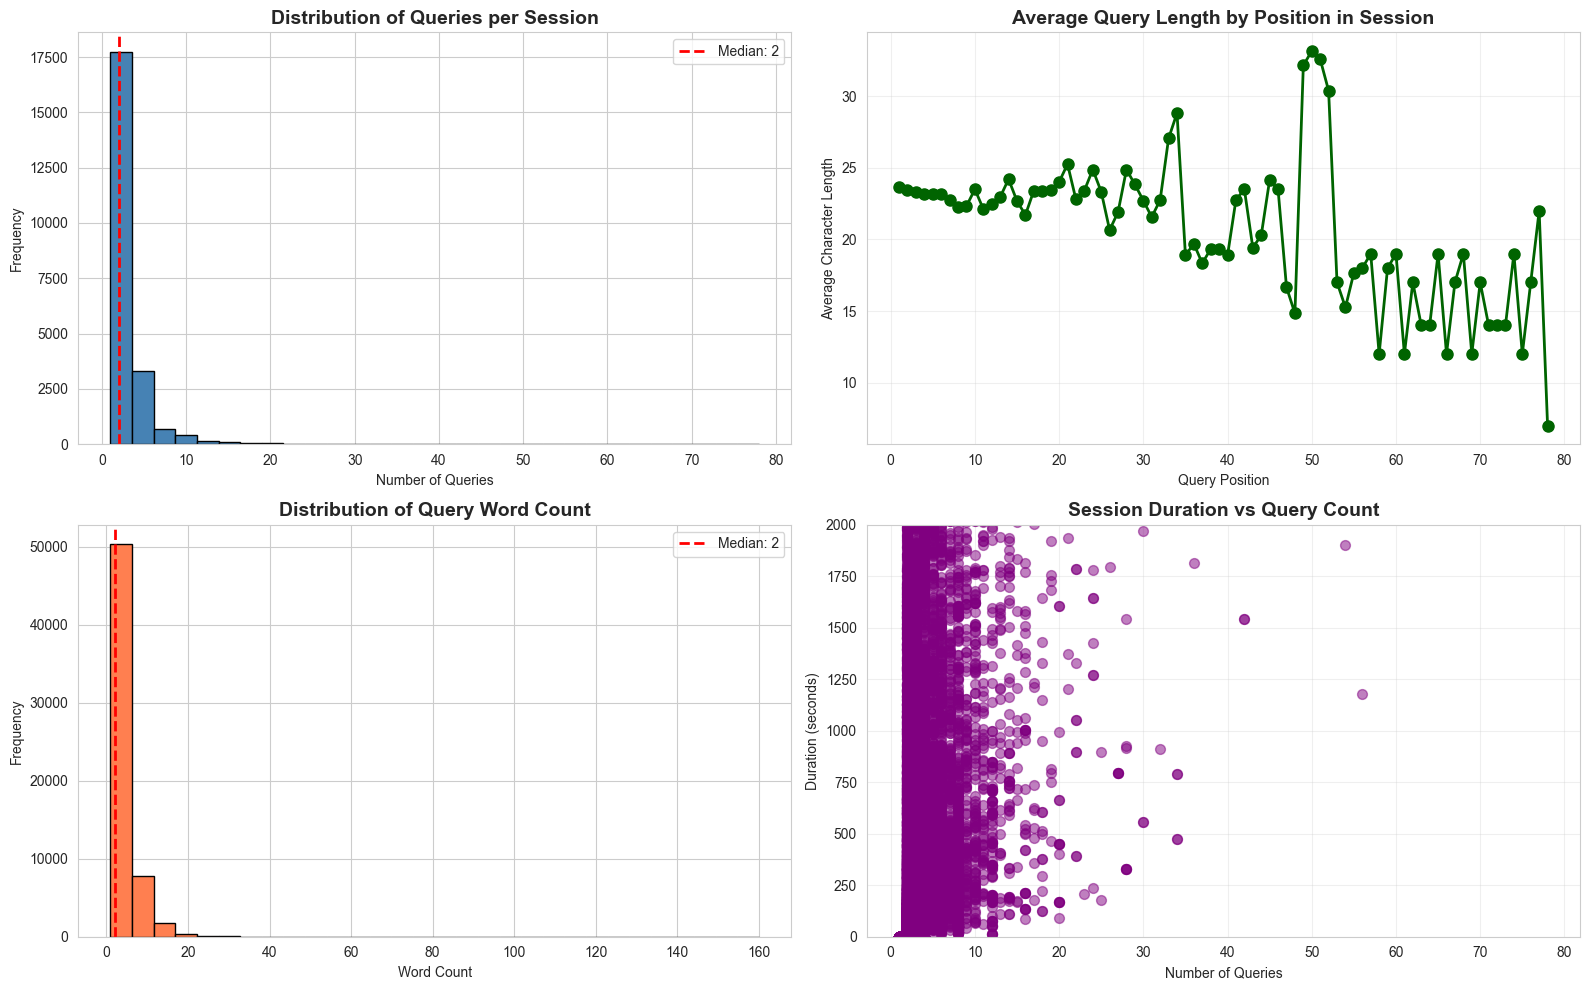


✅ Visualization saved as 'query_reformulation_analysis.png'


In [24]:
# Visualization: Query Patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Query count distribution
session_patterns['query_count'].hist(bins=30, ax=axes[0,0], edgecolor='black', color='steelblue')
axes[0,0].set_title('Distribution of Queries per Session', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Number of Queries')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(session_patterns['query_count'].median(), color='red', 
                  linestyle='--', linewidth=2, label=f'Median: {session_patterns["query_count"].median():.0f}')
axes[0,0].legend()

# Plot 2: Query length evolution
position_length = queries_sorted.groupby('query_position')['query_length'].mean()
position_length.plot(ax=axes[0,1], marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[0,1].set_title('Average Query Length by Position in Session', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Query Position')
axes[0,1].set_ylabel('Average Character Length')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Word count distribution
queries_sorted['word_count'].hist(bins=30, ax=axes[1,0], edgecolor='black', color='coral')
axes[1,0].set_title('Distribution of Query Word Count', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Word Count')
axes[1,0].set_ylabel('Frequency')
axes[1,0].axvline(queries_sorted['word_count'].median(), color='red', 
                  linestyle='--', linewidth=2, label=f'Median: {queries_sorted["word_count"].median():.0f}')
axes[1,0].legend()

# Plot 4: Session duration vs query count
session_with_duration = session_patterns.merge(sessions[['session_id', 'duration']], on='session_id')
axes[1,1].scatter(session_with_duration['query_count'], 
                 session_with_duration['duration'], alpha=0.5, s=50, color='purple')
axes[1,1].set_title('Session Duration vs Query Count', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Queries')
axes[1,1].set_ylabel('Duration (seconds)')
axes[1,1].set_ylim(0, 2000)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('query_reformulation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'query_reformulation_analysis.png'")

---
## 7. User Segmentation Analysis

In [25]:
# Create user-level metrics
users['avg_queries_per_session'] = users['total_queries'] / users['total_session']
users['avg_duration_per_session'] = users['total_duration'] / users['total_session']

# Define user segments based on engagement
def categorize_user(row):
    if row['total_session'] == 1:
        return '1. Bounced Users (1 Session)'
    elif row['total_session'] <= 5:
        return '2. Casual Users (2-5 Sessions)'
    elif row['total_session'] <= 10:
        return '3. Active Users (6-10 Sessions)'
    else:
        return '4. Power Users (10+ Sessions)'

users['user_segment'] = users.apply(categorize_user, axis=1)

print("✅ User segmentation completed")

✅ User segmentation completed


In [26]:
# Segment statistics
print("\n👥 USER SEGMENT STATISTICS\n" + "="*80)

segment_stats = users.groupby('user_segment').agg({
    'user_id': 'count',
    'total_session': 'mean',
    'total_queries': 'mean',
    'total_duration': 'mean',
    'avg_queries_per_session': 'mean',
    'avg_duration_per_session': 'mean'
}).round(2)

segment_stats.columns = ['User Count', 'Avg Sessions', 'Avg Total Queries', 
                         'Avg Total Duration (s)', 'Avg Queries/Session', 'Avg Duration/Session (s)']

# Add percentage
segment_stats['% of Users'] = (segment_stats['User Count'] / segment_stats['User Count'].sum() * 100).round(1)

display(segment_stats)


👥 USER SEGMENT STATISTICS


,User Count,Avg Sessions,Avg Total Queries,Avg Total Duration (s),Avg Queries/Session,Avg Duration/Session (s),% of Users
user_segment,,,,,,,
1. Bounced Users (1 Session),1262,1.00,2.49,259.59,2.49,259.59,37.50
2. Casual Users (2-5 Sessions),1179,2.93,7.37,881.31,2.54,295.96,35.00
3. Active Users (6-10 Sessions),400,7.67,20.16,3037.46,2.62,391.50,11.90
4. Power Users (10+ Sessions),523,31.18,75.11,13685.69,2.45,409.17,15.50


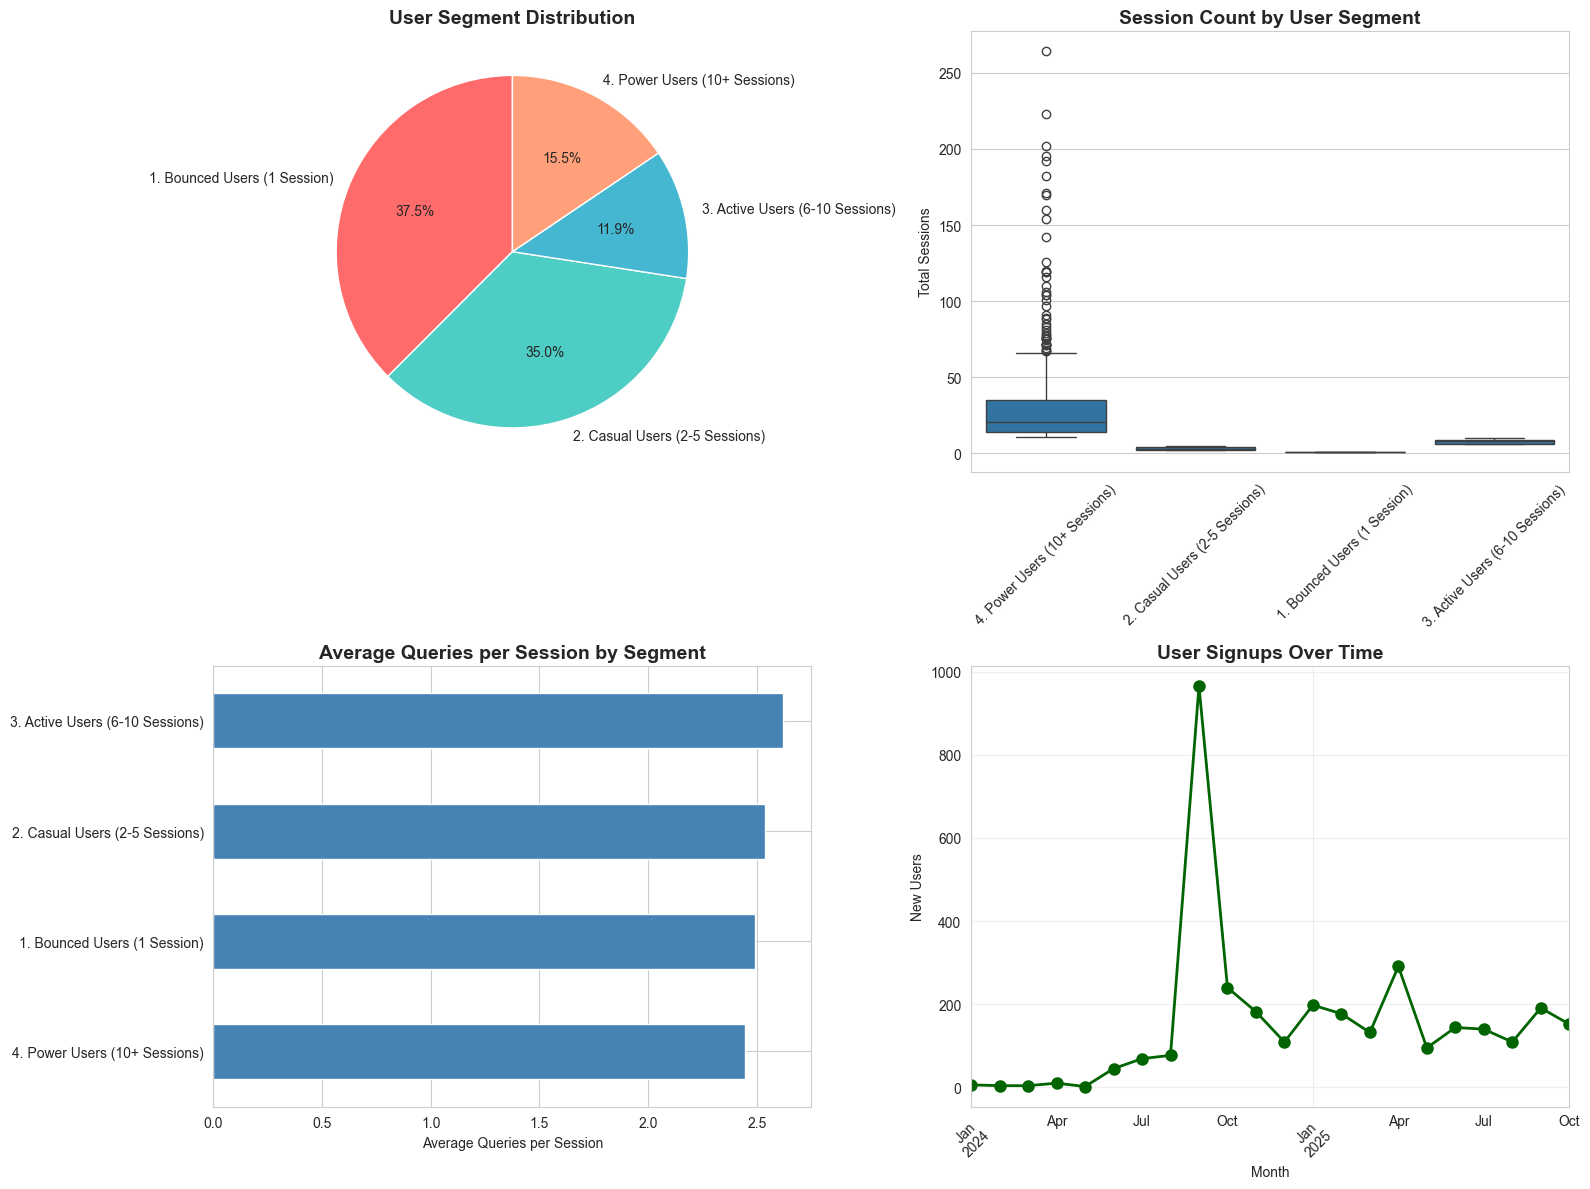


✅ Visualization saved as 'user_segmentation_analysis.png'


In [27]:
# Visualization: User Segmentation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Segment distribution (pie chart)
segment_counts = users['user_segment'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[0,0].pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
              startangle=90, colors=colors, textprops={'fontsize': 10})
axes[0,0].set_title('User Segment Distribution', fontsize=14, fontweight='bold')

# Plot 2: Sessions by segment (box plot)
sns.boxplot(data=users, x='user_segment', y='total_session', ax=axes[0,1])
axes[0,1].set_title('Session Count by User Segment', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Total Sessions')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Average queries per session by segment
segment_queries = users.groupby('user_segment')['avg_queries_per_session'].mean().sort_values()
segment_queries.plot(kind='barh', ax=axes[1,0], color='steelblue')
axes[1,0].set_title('Average Queries per Session by Segment', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Average Queries per Session')
axes[1,0].set_ylabel('')

# Plot 4: User signups over time
user_timeline = users.copy()
user_timeline['signup_date'] = pd.to_datetime(user_timeline['first_connection'])
user_timeline['signup_month'] = user_timeline['signup_date'].dt.to_period('M')
monthly_signups = user_timeline.groupby('signup_month').size()
monthly_signups.plot(ax=axes[1,1], marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1,1].set_title('User Signups Over Time', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('New Users')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('user_segmentation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'user_segmentation_analysis.png'")

---
## 8. COMBINED ANALYSIS: Confidence × Behavior Interaction

**This is the key integration for your combined thesis!**

In [28]:
# Create master dataset combining confidence + behavior
session_first_conf = kendra_queries.sort_values('datetime').groupby('session_id').first()[['highest_confidence']]

# Merge with session data
master_df = sessions.merge(session_first_conf, on='session_id', how='left')

# Add user experience level
master_df = master_df.merge(users[['user_id', 'total_session', 'user_segment']], 
                             on='user_id', how='left', suffixes=('', '_total'))

print(f"✅ Master dataset created with {len(master_df):,} sessions")
print(f"Sessions with confidence data: {master_df['highest_confidence'].notna().sum():,}")
print(f"Sessions with user segment: {master_df['user_segment'].notna().sum():,}")

✅ Master dataset created with 24,087 sessions
Sessions with confidence data: 21,526
Sessions with user segment: 24,087


In [29]:
# Create behavioral categories
master_df['duration_category'] = pd.cut(master_df['duration'], 
                                        bins=[0, 60, 300, 1800, float('inf')],
                                        labels=['Very Short (<1min)', 'Short (1-5min)', 
                                               'Medium (5-30min)', 'Long (>30min)'])

master_df['query_category'] = pd.cut(master_df['nb_queries'],
                                     bins=[0, 1, 3, 6, float('inf')],
                                     labels=['Single Query', 'Few (2-3)', 
                                            'Several (4-6)', 'Many (7+)'])

print("✅ Behavioral categories created")

✅ Behavioral categories created


In [30]:
# KEY ANALYSIS: Quick abandonment interpretation by confidence
print("\n🚪 QUICK ABANDONMENT ANALYSIS\n" + "="*80)
print("Same behavior (short duration + 1 query), different contexts:\n")

quick_abandon = master_df[(master_df['duration'] < 60) & (master_df['nb_queries'] == 1)]

if len(quick_abandon) > 0:
    print(f"Total quick abandonment sessions: {len(quick_abandon):,} ({len(quick_abandon)/len(master_df)*100:.1f}% of all sessions)\n")
    
    quick_by_conf = quick_abandon.groupby('highest_confidence').size().sort_values(ascending=False)
    print("Distribution by confidence level:")
    for conf, count in quick_by_conf.items():
        print(f"  {conf}: {count:,} ({count/len(quick_abandon)*100:.1f}%)")
    
    print("\n💡 INTERPRETATION:")
    print("  - Quick exit after VERY_HIGH confidence likely = SATISFIED (got answer)")
    print("  - Quick exit after LOW/MEDIUM confidence likely = FRUSTRATED (gave up)")
    print("  → Same behavior, different satisfaction!")


🚪 QUICK ABANDONMENT ANALYSIS
Same behavior (short duration + 1 query), different contexts:

Total quick abandonment sessions: 10,535 (43.7% of all sessions)

Distribution by confidence level:
  HIGH: 7,605 (72.2%)
  VERY_HIGH: 1,213 (11.5%)
  NOT_AVAILABLE: 617 (5.9%)
  MEDIUM: 242 (2.3%)

💡 INTERPRETATION:
  - Quick exit after VERY_HIGH confidence likely = SATISFIED (got answer)
  - Quick exit after LOW/MEDIUM confidence likely = FRUSTRATED (gave up)
  → Same behavior, different satisfaction!


In [31]:
# Analysis: Persistent search by confidence
print("\n🔄 PERSISTENT SEARCH ANALYSIS\n" + "="*80)
print("Users who keep searching (5+ queries):\n")

persistent = master_df[master_df['nb_queries'] >= 5]

if len(persistent) > 0:
    print(f"Total persistent sessions: {len(persistent):,} ({len(persistent)/len(master_df)*100:.1f}% of all sessions)\n")
    
    persist_by_conf = persistent.groupby('highest_confidence').agg({
        'session_id': 'count',
        'duration': 'mean',
        'nb_queries': 'mean'
    }).round(2)
    persist_by_conf.columns = ['Count', 'Avg Duration (s)', 'Avg Queries']
    display(persist_by_conf)
    
    print("\n💡 INTERPRETATION:")
    print("  - Persistence after LOW confidence = Expected (need better answer)")
    print("  - Persistence after HIGH confidence = Interesting (validating? or unsatisfied?)")


🔄 PERSISTENT SEARCH ANALYSIS
Users who keep searching (5+ queries):

Total persistent sessions: 2,746 (11.4% of all sessions)



,Count,Avg Duration (s),Avg Queries
highest_confidence,,,
HIGH,1871,1574.05,7.54
MEDIUM,61,1941.80,8.44
NOT_AVAILABLE,156,1363.99,7.40
VERY_HIGH,265,1790.46,7.54



💡 INTERPRETATION:
  - Persistence after LOW confidence = Expected (need better answer)
  - Persistence after HIGH confidence = Interesting (validating? or unsatisfied?)


In [32]:
# Cross-tabulation: Duration × Confidence
print("\n📊 DURATION × CONFIDENCE CROSS-TABULATION\n" + "="*80)

behavior_conf = pd.crosstab(master_df['duration_category'], 
                             master_df['highest_confidence'], 
                             margins=True, 
                             margins_name='Total')
display(behavior_conf)

# Percentage version
print("\nPercentage within each confidence level:")
behavior_conf_pct = pd.crosstab(master_df['duration_category'], 
                                 master_df['highest_confidence'], 
                                 normalize='columns') * 100
display(behavior_conf_pct.round(1))


📊 DURATION × CONFIDENCE CROSS-TABULATION


highest_confidence,HIGH,MEDIUM,NOT_AVAILABLE,VERY_HIGH,Total
duration_category,,,,,
Very Short (<1min),2232,79,365,347,3023
Short (1-5min),3082,71,258,369,3780
Medium (5-30min),2857,92,185,410,3544
Long (>30min),1294,30,91,185,1600
Total,9465,272,899,1311,11947



Percentage within each confidence level:


highest_confidence,HIGH,MEDIUM,NOT_AVAILABLE,VERY_HIGH
duration_category,,,,
Very Short (<1min),23.60,29.00,40.60,26.50
Short (1-5min),32.60,26.10,28.70,28.10
Medium (5-30min),30.20,33.80,20.60,31.30
Long (>30min),13.70,11.00,10.10,14.10


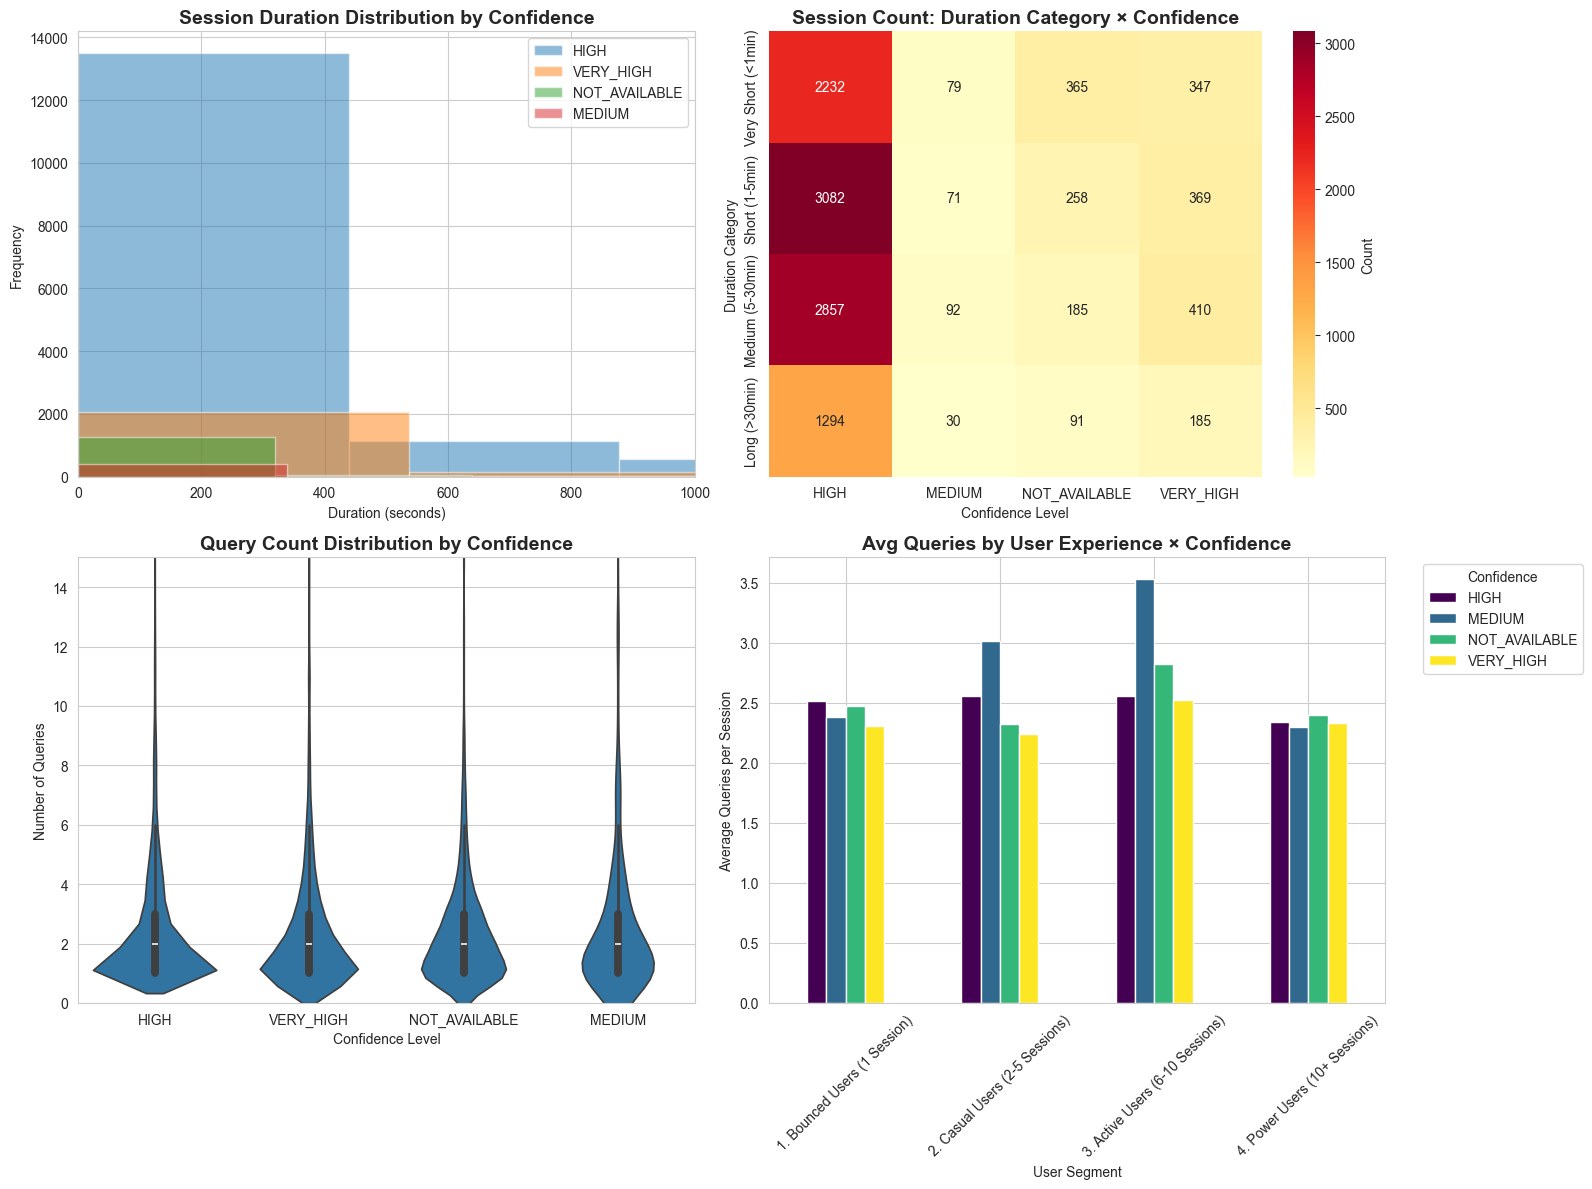


✅ Visualization saved as 'confidence_behavior_interaction.png'


In [33]:
# Visualization: Confidence × Behavior Interaction
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Duration distribution by confidence (overlapping histograms)
master_df_clean = master_df.dropna(subset=['highest_confidence'])
for conf in master_df_clean['highest_confidence'].unique():
    data = master_df_clean[master_df_clean['highest_confidence'] == conf]['duration']
    axes[0,0].hist(data, alpha=0.5, label=conf, bins=30)
axes[0,0].set_title('Session Duration Distribution by Confidence', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Duration (seconds)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].set_xlim(0, 1000)

# Plot 2: Heatmap of duration category × confidence
pivot_duration = pd.crosstab(master_df['duration_category'], 
                              master_df['highest_confidence'])
sns.heatmap(pivot_duration, annot=True, fmt='g', cmap='YlOrRd', ax=axes[0,1], cbar_kws={'label': 'Count'})
axes[0,1].set_title('Session Count: Duration Category × Confidence', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Confidence Level')
axes[0,1].set_ylabel('Duration Category')

# Plot 3: Query count by confidence (violin plot)
if len(master_df_clean) > 0:
    sns.violinplot(data=master_df_clean, x='highest_confidence', y='nb_queries', ax=axes[1,0])
    axes[1,0].set_title('Query Count Distribution by Confidence', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Number of Queries')
    axes[1,0].set_xlabel('Confidence Level')
    axes[1,0].set_ylim(0, 15)

# Plot 4: User experience moderation effect
if 'user_segment' in master_df.columns:
    experience_conf = master_df.groupby(['user_segment', 'highest_confidence'])['nb_queries'].mean().unstack()
    experience_conf.plot(kind='bar', ax=axes[1,1], colormap='viridis')
    axes[1,1].set_title('Avg Queries by User Experience × Confidence', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Average Queries per Session')
    axes[1,1].set_xlabel('User Segment')
    axes[1,1].legend(title='Confidence', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('confidence_behavior_interaction.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved as 'confidence_behavior_interaction.png'")

### 💡 Key Insights - Combined Analysis

**Main Finding:**
- The same behavioral pattern (e.g., quick abandonment) can indicate DIFFERENT satisfaction levels depending on confidence context
- This suggests that satisfaction prediction models MUST include confidence as a moderating variable

**Implications for Thesis:**
1. **Topic 1 validated**: Confidence clearly affects behavior
2. **Topic 3 enhanced**: Behavioral signals alone are insufficient; need context
3. **Integration justified**: Combined approach yields richer insights

---
## 9. Thesis Feasibility Assessment

In [34]:
def assess_thesis_feasibility():
    """Comprehensive feasibility check for combined thesis"""
    
    print("\n" + "="*80)
    print("✅ THESIS FEASIBILITY ASSESSMENT")
    print("="*80)
    
    # Data volume checks
    checks = {
        'Total Sessions': len(sessions),
        'Total Queries': len(queries),
        'Total Users': users['user_id'].nunique(),
        'Date Range (days)': (sessions['date'].max() - sessions['date'].min()).days,
        'Sessions with Confidence Data': master_df['highest_confidence'].notna().sum(),
        'Multi-Query Sessions': len(master_df[master_df['nb_queries'] > 1]),
        'Sessions with User Info': master_df['user_id'].notna().sum(),
    }
    
    print("\n📊 DATA VOLUME:")
    for check, value in checks.items():
        print(f"  {check}: {value:,}")
    
    # Confidence level distribution
    print("\n🎯 CONFIDENCE LEVEL COVERAGE:")
    conf_coverage = master_df['highest_confidence'].value_counts().sort_index()
    
    sufficient_data = True
    for conf, count in conf_coverage.items():
        status = "✅" if count >= 50 else "⚠️"
        print(f"  {status} {conf}: {count:,} sessions")
        if count < 50:
            print(f"     WARNING: Low sample size")
            sufficient_data = False
    
    # User segment distribution
    print("\n👥 USER EXPERIENCE COVERAGE:")
    segment_coverage = master_df['user_segment'].value_counts()
    for segment, count in segment_coverage.items():
        print(f"  {segment}: {count:,} sessions")
    
    # Missing data assessment
    print("\n❓ MISSING DATA:")
    missing_conf = master_df['highest_confidence'].isna().sum()
    missing_user = master_df['user_id'].isna().sum()
    
    missing_conf_pct = missing_conf / len(master_df) * 100
    missing_user_pct = missing_user / len(master_df) * 100
    
    print(f"  Sessions without confidence: {missing_conf:,} ({missing_conf_pct:.1f}%)")
    print(f"  Sessions without user info: {missing_user:,} ({missing_user_pct:.1f}%)")
    
    # Statistical power assessment
    print("\n" + "="*80)
    print("📈 STATISTICAL POWER ASSESSMENT")
    print("="*80)
    
    total_sessions = len(master_df)
    sessions_with_conf = master_df['highest_confidence'].notna().sum()
    
    print(f"\nCurrent data:")
    print(f"  Total sessions: {total_sessions:,}")
    print(f"  Sessions with confidence: {sessions_with_conf:,}")
    
    print(f"\nMinimum requirements:")
    print(f"  For t-tests (80% power): ~200 per group")
    print(f"  For regression analysis: ~500 total")
    print(f"  For ML models: ~1,000 total")
    print(f"  For robust ML + segmentation: ~2,000 total")
    
    # Recommendation
    print("\n" + "="*80)
    print("💡 RECOMMENDATION")
    print("="*80)
    
    if total_sessions >= 2000 and sufficient_data:
        print("\n✅✅ EXCELLENT: Your data is ideal for the combined thesis!")
        print("\nYou can:")
        print("  • Conduct full statistical analysis (Topic 1)")
        print("  • Build robust ML models (Topic 3)")
        print("  • Test moderation effects comprehensively")
        print("  • Segment users and analyze subgroups")
        print("  • Publish multiple papers from this thesis")
        
    elif total_sessions >= 1000 and sufficient_data:
        print("\n✅ GOOD: Your data supports the combined thesis!")
        print("\nYou can:")
        print("  • Conduct statistical analysis (Topic 1)")
        print("  • Build ML models with moderate complexity (Topic 3)")
        print("  • Test key interaction effects")
        print("  • May need to simplify some segmentation analyses")
        
    elif total_sessions >= 500:
        print("\n⚠️ ADEQUATE: Data supports a focused thesis")
        print("\nRecommendations:")
        print("  • Focus on descriptive statistics and regression")
        print("  • Use simpler ML models (logistic regression, decision trees)")
        print("  • Emphasize qualitative validation")
        print("  • Consider collecting more data if possible")
        
    else:
        print("\n⚠️ LIMITED: Consider data collection or scope adjustment")
        print("\nOptions:")
        print("  1. Collect more data (recommended)")
        print("  2. Focus on exploratory analysis only")
        print("  3. Choose Topic 1 OR Topic 3 (not combined)")
    
    # Ground truth collection reminder
    print("\n" + "="*80)
    print("🎯 CRITICAL NEXT STEP")
    print("="*80)
    print("\nFor Topic 3 (Implicit Feedback), you NEED satisfaction labels!")
    print("\nOptions:")
    print("  1. Add 'Was this helpful?' button to chatbot (BEST)")
    print("     • Collect 500-1000 labeled sessions")
    print("     • Takes 2-4 weeks")
    print("  2. Manual annotation (ALTERNATIVE)")
    print("     • Annotate 300-500 sessions with 2 raters")
    print("     • Calculate inter-rater reliability")
    
    return checks

feasibility = assess_thesis_feasibility()


✅ THESIS FEASIBILITY ASSESSMENT

📊 DATA VOLUME:
  Total Sessions: 24,087
  Total Queries: 60,342
  Total Users: 3,364
  Date Range (days): 668
  Sessions with Confidence Data: 21,526
  Multi-Query Sessions: 13,385
  Sessions with User Info: 24,087

🎯 CONFIDENCE LEVEL COVERAGE:
  ✅ HIGH: 16,987 sessions
  ✅ MEDIUM: 511 sessions
  ✅ NOT_AVAILABLE: 1,516 sessions
  ✅ VERY_HIGH: 2,512 sessions

👥 USER EXPERIENCE COVERAGE:
  4. Power Users (10+ Sessions): 16,305 sessions
  2. Casual Users (2-5 Sessions): 3,453 sessions
  3. Active Users (6-10 Sessions): 3,067 sessions
  1. Bounced Users (1 Session): 1,262 sessions

❓ MISSING DATA:
  Sessions without confidence: 2,561 (10.6%)
  Sessions without user info: 0 (0.0%)

📈 STATISTICAL POWER ASSESSMENT

Current data:
  Total sessions: 24,087
  Sessions with confidence: 21,526

Minimum requirements:
  For t-tests (80% power): ~200 per group
  For regression analysis: ~500 total
  For ML models: ~1,000 total
  For robust ML + segmentation: ~2,000 to

---
## 10. Export Processed Datasets

In [35]:
# Export all processed datasets for further analysis
print("\n💾 EXPORTING PROCESSED DATASETS\n" + "="*80)

# 1. Master analytical dataset (MOST IMPORTANT)
master_df.to_csv('master_analysis_dataset.csv', index=False)
print(f"✅ master_analysis_dataset.csv")
print(f"   Rows: {len(master_df):,} | Columns: {len(master_df.columns)}")
print(f"   Use for: All statistical analysis and modeling")

# 2. User-level aggregated data
user_summary = users[['user_id', 'user_segment', 'total_session', 
                      'total_queries', 'total_duration', 
                      'avg_queries_per_session', 'avg_duration_per_session']]
user_summary.to_csv('user_summary.csv', index=False)
print(f"\n✅ user_summary.csv")
print(f"   Rows: {len(user_summary):,}")
print(f"   Use for: User-level analysis")

# 3. Session-level with confidence
session_cols = ['session_id', 'user_id', 'date', 'duration', 'nb_queries', 
                'highest_confidence', 'user_segment', 'duration_category', 'query_category']
session_analysis = master_df[[col for col in session_cols if col in master_df.columns]]
session_analysis.to_csv('session_analysis.csv', index=False)
print(f"\n✅ session_analysis.csv")
print(f"   Rows: {len(session_analysis):,}")
print(f"   Use for: Session-level modeling")

# 4. Query-level enriched data
queries_enriched = queries_sorted[['datetime', 'user_id', 'session_id', 'id', 'text',
                                    'query_length', 'word_count', 'query_position']]
queries_enriched.to_csv('queries_enriched.csv', index=False)
print(f"\n✅ queries_enriched.csv")
print(f"   Rows: {len(queries_enriched):,}")
print(f"   Use for: NLP analysis, query similarity")

# 5. First query confidence per session
first_query_conf.to_csv('first_query_confidence.csv')
print(f"\n✅ first_query_confidence.csv")
print(f"   Rows: {len(first_query_conf):,}")
print(f"   Use for: Topic 1 analysis")

print("\n" + "="*80)
print("✅ All datasets exported successfully!")
print("\nThese files are ready for:")
print("  • Statistical analysis (R, SPSS, Python)")
print("  • Machine learning modeling")
print("  • Visualization tools")
print("  • Thesis writing and reporting")


💾 EXPORTING PROCESSED DATASETS
✅ master_analysis_dataset.csv
   Rows: 24,087 | Columns: 14
   Use for: All statistical analysis and modeling

✅ user_summary.csv
   Rows: 3,364
   Use for: User-level analysis

✅ session_analysis.csv
   Rows: 24,087
   Use for: Session-level modeling

✅ queries_enriched.csv
   Rows: 60,342
   Use for: NLP analysis, query similarity

✅ first_query_confidence.csv
   Rows: 20,125
   Use for: Topic 1 analysis

✅ All datasets exported successfully!

These files are ready for:
  • Statistical analysis (R, SPSS, Python)
  • Machine learning modeling
  • Visualization tools
  • Thesis writing and reporting


---
## 11. Generate Summary Report

In [ ]:
def generate_summary_report():
    """Create comprehensive text summary"""
    
    report = []
    report.append("="*80)
    report.append("ISA CHATBOT - EXPLORATORY DATA ANALYSIS SUMMARY")
    report.append("Combined Thesis: Trust Calibration & Implicit Feedback in RAG Systems")
    report.append("="*80)
    report.append(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    # 1. Dataset overview
    report.append("\n\n1. DATASET OVERVIEW")
    report.append("-" * 40)
    report.append(f"Total Users: {users['user_id'].nunique():,}")
    report.append(f"Total Sessions: {sessions['session_id'].nunique():,}")
    report.append(f"Total Queries: {len(queries):,}")
    report.append(f"Date Range: {sessions['date'].min()} to {sessions['date'].max()}")
    report.append(f"Days of Data: {(sessions['date'].max() - sessions['date'].min()).days}")
    
    # 2. User engagement
    report.append("\n\n2. USER ENGAGEMENT METRICS")
    report.append("-" * 40)
    report.append(f"Average sessions per user: {users['total_session'].mean():.2f}")
    report.append(f"Median sessions per user: {users['total_session'].median():.0f}")
    report.append(f"Average queries per session: {sessions['nb_queries'].mean():.2f}")
    report.append(f"Average session duration: {sessions['duration'].mean()/60:.1f} minutes")
    
    # 3. Confidence distribution
    report.append("\n\n3. CONFIDENCE LEVEL DISTRIBUTION")
    report.append("-" * 40)
    conf_dist = kendra_queries['highest_confidence'].value_counts().sort_index()
    for conf, count in conf_dist.items():
        report.append(f"{conf}: {count:,} ({count/len(kendra_queries)*100:.1f}%)")
    
    # 4. User segments
    report.append("\n\n4. USER SEGMENTATION")
    report.append("-" * 40)
    segment_dist = users['user_segment'].value_counts().sort_index()
    for segment, count in segment_dist.items():
        report.append(f"{segment}: {count:,} ({count/len(users)*100:.1f}%)")
    
    # 5. Topic 1 findings
    report.append("\n\n5. TOPIC 1: CONFIDENCE EFFECTS ON BEHAVIOR")
    report.append("-" * 40)
    conf_duration = master_df.groupby('highest_confidence')['duration'].mean()
    report.append("Average session duration by confidence:")
    for conf, dur in conf_duration.items():
        report.append(f"  {conf}: {dur:.0f}s ({dur/60:.1f} min)")
    
    # 6. Combined analysis
    report.append("\n\n6. KEY INSIGHT: CONFIDENCE × BEHAVIOR INTERACTION")
    report.append("-" * 40)
    quick_abandon = master_df[(master_df['duration'] < 60) & (master_df['nb_queries'] == 1)]
    report.append(f"Quick abandonment sessions: {len(quick_abandon):,} ({len(quick_abandon)/len(master_df)*100:.1f}%)")
    report.append("\nInterpretation depends on confidence context:")
    report.append("  • After VERY_HIGH confidence = likely satisfied")
    report.append("  • After LOW confidence = likely frustrated")
    report.append("→ Same behavior, different meanings!")
    
    # 7. Feasibility
    report.append("\n\n7. THESIS FEASIBILITY")
    report.append("-" * 40)
    
    total_sessions = len(master_df)
    if total_sessions >= 2000:
        report.append("✅ EXCELLENT: Sample size supports full combined analysis")
        report.append("   • Sufficient for all statistical tests")
        report.append("   • Sufficient for ML modeling")
        report.append("   • Can support user segmentation")
    elif total_sessions >= 1000:
        report.append("✅ GOOD: Sample size adequate for master's thesis")
        report.append("   • Sufficient for statistical analysis")
        report.append("   • Sufficient for ML with moderate complexity")
    elif total_sessions >= 500:
        report.append("⚠️  ADEQUATE: Can proceed with simplified approach")
        report.append("   • Focus on regression and basic ML")
        report.append("   • Emphasize qualitative validation")
    else:
        report.append("⚠️  LIMITED: Consider collecting more data")
    
    # 8. Next steps
    report.append("\n\n8. RECOMMENDED NEXT STEPS")
    report.append("-" * 40)
    report.append("1. Collect satisfaction labels (500-1000 sessions)")
    report.append("2. Perform NLP analysis (query similarity)")
    report.append("3. Build baseline satisfaction prediction model")
    report.append("4. Test moderation effects (confidence × behavior)")
    report.append("5. Conduct user interviews for validation")
    report.append("6. Write thesis chapters based on findings")
    
    report.append("\n\n" + "="*80)
    report.append("END OF REPORT")
    report.append("="*80)
    
    # Save and display
    report_text = "\n".join(report)
    
    with open('eda_summary_report.txt', 'w', encoding='utf-8') as f:
        f.write(report_text)
    
    print(report_text)
    print("\n✅ Summary report saved as 'eda_summary_report.txt'")

generate_summary_report()

---
## 12. Next Steps & Resources

### 🚀 Immediate Next Steps

1. **Ground Truth Collection** (CRITICAL)
   - Add satisfaction rating to chatbot
   - Collect 500-1000 labeled sessions
   - Alternative: Manually annotate 300 sessions

2. **Advanced Feature Engineering**
   - Query similarity (semantic embeddings)
   - Frustration detection (NLP)
   - Interaction features (confidence × behavior)

3. **Statistical Analysis**
   - T-tests for confidence effects
   - Regression with interaction terms
   - Moderation analysis

4. **Predictive Modeling**
   - Baseline models
   - Confidence-stratified models
   - Model comparison

5. **Qualitative Validation**
   - User interviews (15-20)
   - Think-aloud studies (10)

### 📚 Recommended Reading

**Trust & Calibration:**
- Lee & See (2004) - Trust in Automation
- Bansal et al. (2021) - Does the Whole Exceed its Parts?

**Implicit Feedback:**
- Hassan et al. (2013) - User Behavior as Predictor of Search Satisfaction
- Kelly & Teevan (2003) - Implicit Feedback for IR

**RAG Systems:**
- Lewis et al. (2020) - Retrieval-Augmented Generation for LLMs
- Gao et al. (2023) - Retrieval-Augmented Generation for LLMs: A Survey

### 🎓 Thesis Timeline

- **Month 1-2**: Literature review + Ground truth collection
- **Month 3-4**: Topic 1 analysis (Confidence effects)
- **Month 5-6**: Topic 3 analysis (Satisfaction modeling)
- **Month 7-8**: Integration (Moderation analysis)
- **Month 9-10**: Experimental validation + Interviews
- **Month 11-12**: Writing + Revisions

### 💡 Tips for Success

1. **Document everything** - Keep detailed notes of decisions
2. **Version control** - Use Git for code and analyses
3. **Regular meetings** - Update advisor bi-weekly
4. **Iterate quickly** - Start simple, add complexity
5. **Write early** - Draft chapters as you analyze

---

## ✅ Notebook Complete!

**Generated Files:**
- 📊 `confidence_behavior_analysis.png`
- 📊 `query_reformulation_analysis.png`
- 📊 `user_segmentation_analysis.png`
- 📊 `confidence_behavior_interaction.png` (KEY!)
- 📄 `eda_summary_report.txt`
- 💾 `master_analysis_dataset.csv`
- 💾 `user_summary.csv`
- 💾 `session_analysis.csv`
- 💾 `queries_enriched.csv`
- 💾 `first_query_confidence.csv`

**You're ready to start your thesis! 🎓🚀**